In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_style("white")

In [6]:
df = pd.read_csv("datasets/starbucks.csv",index_col=0)
df

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,338.831169,105.368701,80.0,300.0,350.0,420.0,500.0
fat,77.0,13.766234,7.095488,0.0,9.0,13.0,18.0,28.0
carb,77.0,44.870130,16.551634,16.0,31.0,45.0,59.0,80.0
fiber,77.0,2.220779,2.112764,0.0,0.0,2.0,4.0,7.0
protein,77.0,9.480519,8.079556,0.0,5.0,7.0,15.0,34.0


In [26]:
df["item"].nunique()  #77 farklı

77

In [52]:
df["item"].unique() #tüm itemler

array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [32]:
df["item"].isnull().sum()  #boş veri varmı?

0

In [51]:
#İtemler arasında ürün arama
arama = "Blueberry Scone"
if arama in df["item"].unique():
    print(arama,"öğesi bulundu!")
else:
    print(arama,"öğesi bulunamadı.")

Blueberry Scone öğesi bulundu!


In [45]:
df["type"].unique() #tüm itemler

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [60]:
df.groupby("type")["item"].count()  #türlerden kaç adet var

type
bakery           41
bistro box        8
hot breakfast     8
parfait           3
petite            9
salad             1
sandwich          7
Name: item, dtype: int64

In [124]:
plt.style.use('default')

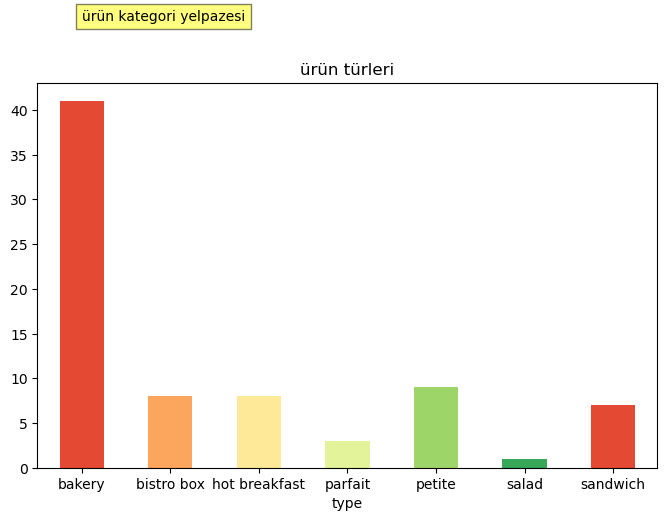

In [111]:
colors = sns.color_palette("RdYlGn")
df.groupby("type")["item"].count().plot(kind = "bar", color=colors, figsize=(8,5))
plt.xticks(fontsize=10, rotation=0)
plt.title("ürün türleri")
plt.text(0.,50,"ürün kategori yelpazesi",bbox=dict(facecolor="yellow",alpha=0.5))
plt.show()

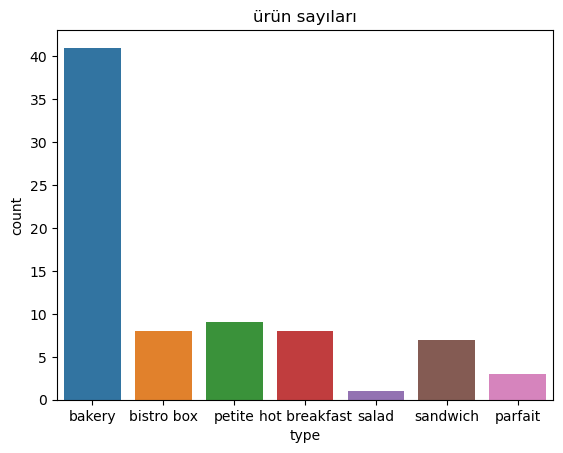

In [123]:
sns.countplot(x="type",data=df)
plt.title("ürün sayıları")
plt.show()

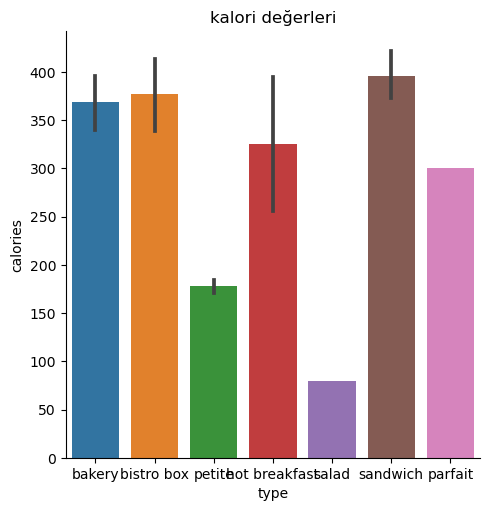

In [158]:
sns.catplot(x = "type", y = "calories", kind="bar",data=df)
plt.title("kalori değerleri")
plt.show()

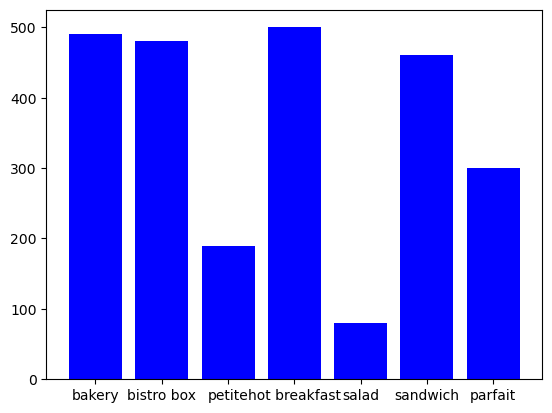

In [171]:
#kendi yaptığım matplotlib
x=df["type"]
y=df["calories"]
plt.bar(x, y,color="blue")
plt.show()

In [165]:
df.groupby("type")["calories"].mean()  # bakerydeki ortalama kaloriler

type
bakery           368.780488
bistro box       377.500000
hot breakfast    325.000000
parfait          300.000000
petite           177.777778
salad             80.000000
sandwich         395.714286
Name: calories, dtype: float64

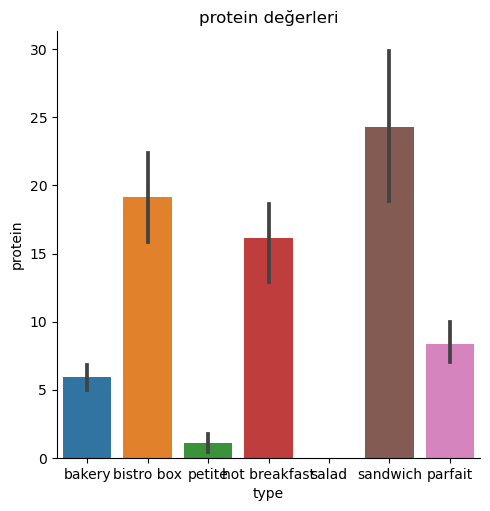

In [172]:
sns.catplot(x = "type", y = "protein", kind="bar",data=df)
plt.title("protein değerleri")
plt.show()

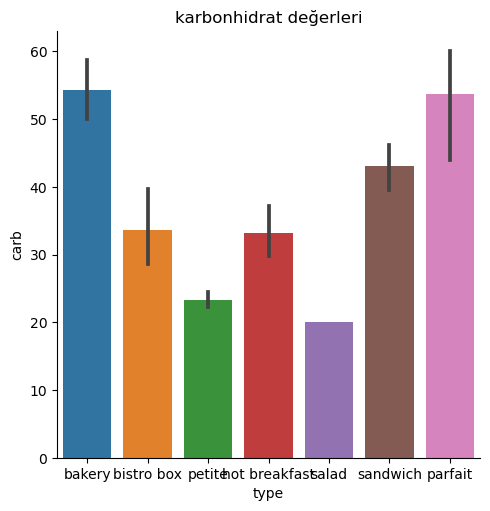

In [176]:
sns.catplot(x = "type", y = "carb", kind="bar",data=df)
plt.title("karbonhidrat değerleri")
plt.show()

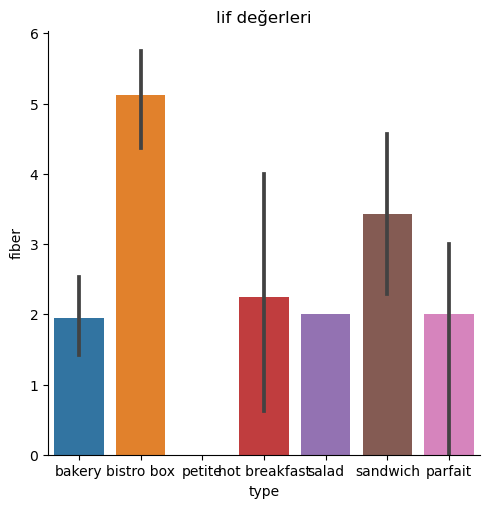

In [175]:
sns.catplot(x = "type", y = "fiber", kind="bar",data=df)
plt.title("lif değerleri")
plt.show()

In [177]:
df.corr()

C:\Users\orkun\AppData\Local\Temp\ipykernel_12328\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,calories,fat,carb,fiber,protein
calories,1.000000,0.758682,0.674999,0.260645,0.410398
fat,0.758682,1.000000,0.144547,-0.028549,0.223470
carb,0.674999,0.144547,1.000000,0.213044,-0.050789
fiber,0.260645,-0.028549,0.213044,1.000000,0.488564
protein,0.410398,0.223470,-0.050789,0.488564,1.000000


C:\Users\orkun\AppData\Local\Temp\ipykernel_12328\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

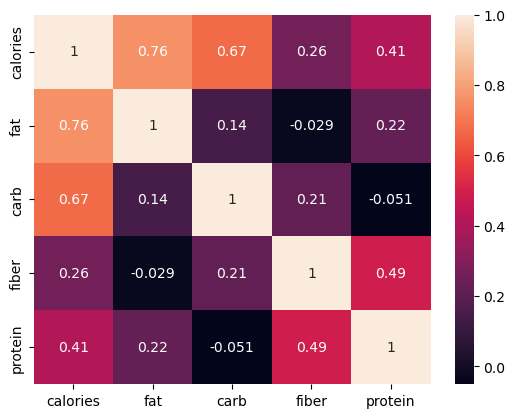

In [180]:
sns.heatmap(df.corr(),annot=True)

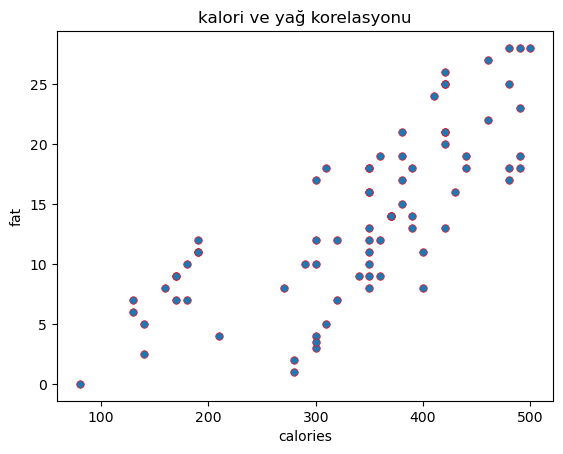

In [189]:
plt.title("kalori ve yağ korelasyonu")
sns.scatterplot(x="calories",y="fat",data=df,s=30,edgecolor="red")
plt.show()

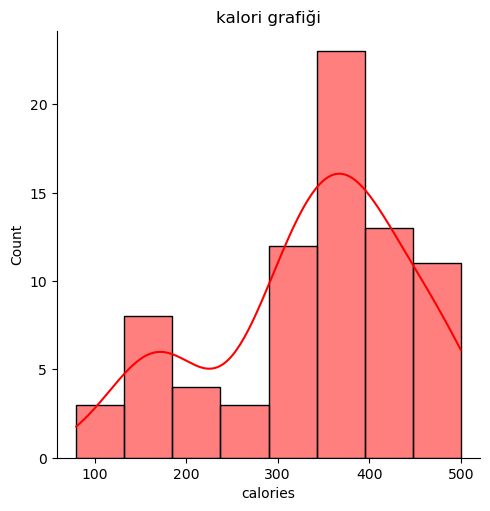

In [191]:
sns.displot(x="calories",data=df,color="red",kde=True)
plt.title("kalori grafiği")
plt.show()

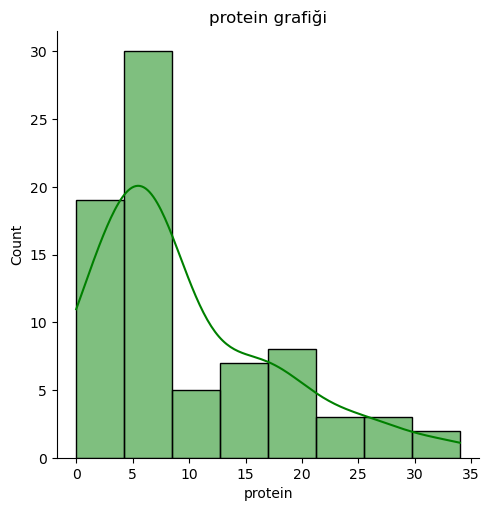

In [195]:
sns.displot(x="protein",data=df,color="green",kde=True)
plt.title("protein grafiği")
plt.show()

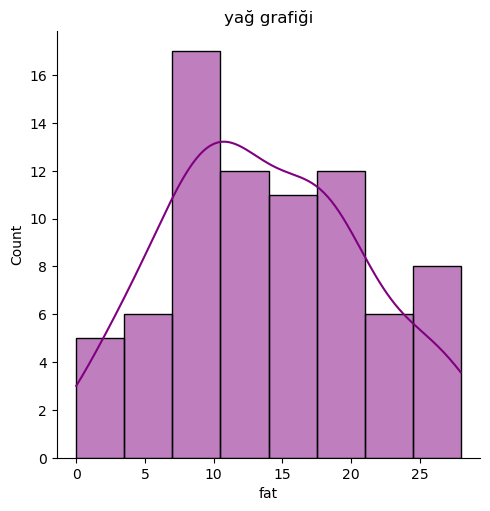

In [196]:
sns.displot(x="fat",data=df,color="purple",kde=True)
plt.title("yağ grafiği")
plt.show()

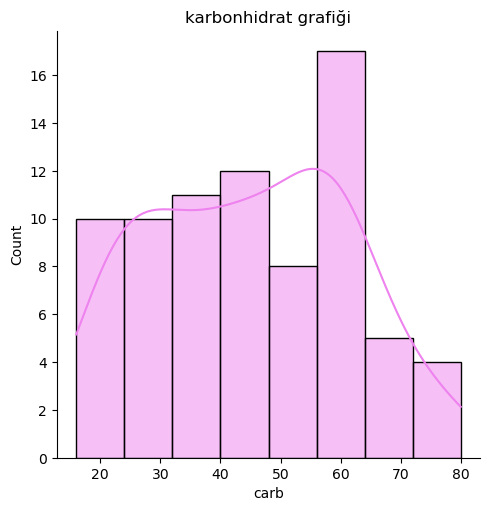

In [198]:
sns.displot(x="carb",data=df,color="violet",kde=True)
plt.title("karbonhidrat grafiği")
plt.show()

In [199]:
df.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [201]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [202]:
x=df[["calories","fat","carb","fiber","protein"]]
y=df["type"]

In [205]:
x

,calories,fat,carb,fiber,protein
1,350,8.0,67,5,10
2,350,9.0,64,7,6
3,420,20.0,59,0,5
4,490,19.0,75,4,7
5,130,6.0,17,0,0
...,...,...,...,...,...
73,420,13.0,46,6,32
74,390,13.0,36,2,34
75,300,12.0,44,0,8
76,300,4.0,57,3,10


In [206]:
y

1       bakery
2       bakery
3       bakery
4       bakery
5       bakery
        ...   
73    sandwich
74    sandwich
75     parfait
76     parfait
77     parfait
Name: type, Length: 77, dtype: object

In [207]:
x_train,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [208]:
model= DecisionTreeClassifier()
model.fit(x_train,ytrain)

DecisionTreeClassifier()

In [209]:
y_pred = model.predict(xtest)

In [210]:
accuracy = accuracy_score(ytest,y_pred)

In [212]:
print("doğruluk",accuracy)

doğruluk 0.75


In [213]:
df

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


In [249]:
prediction=model.predict([[0,0,39,7,13]])

D:\Data_Science\datascienceana\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [250]:
print(prediction)

['hot breakfast']


In [234]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [235]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [242]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=x.columns,class_names=model.classes_,filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['calories', 'fat', 'carb', 'fiber', 'protein'], dtype='object') instead.

<Figure size 1500x1000 with 0 Axes>

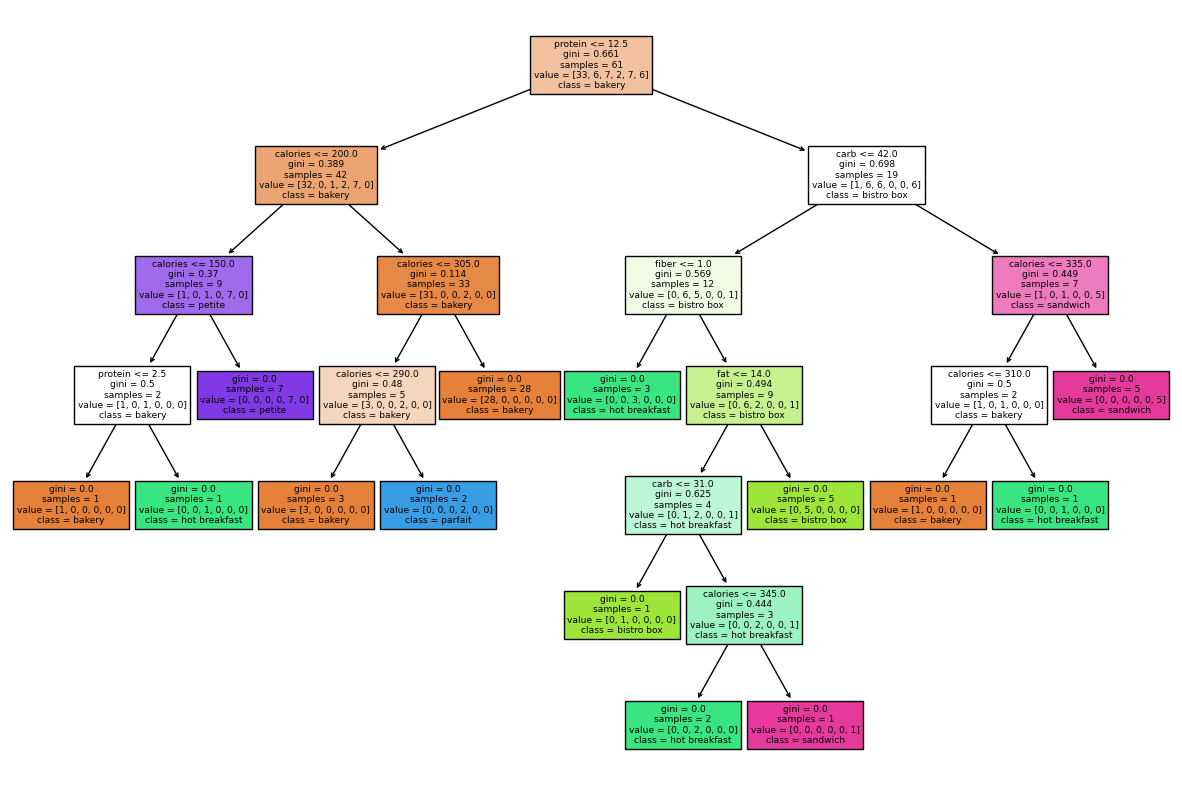

In [244]:
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=x.columns.tolist(), class_names=model.classes_.tolist(), filled=True)
plt.show()